In [26]:
import numpy as np

def jacobi(A, b, x0, tol=1e-6, max_iterations=100):
    n = len(b)
    x = x0.copy()
    e = []
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # Check for convergence
        e.append(np.linalg.norm(x_new - x, ord=np.inf)) # save error
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, e
        x = x_new
    return x, max_iterations, e

In [34]:
import numpy as np

def gauss_seidel(A, b, x0, tol=1e-6, max_iterations=100):
    n = len(b)
    x = x0.copy()
    e = []
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        # Check for convergence
        e.append(np.linalg.norm(x_new - x, ord=np.inf)) # save error
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k, e
        x = x_new
    return x, max_iterations, e

In [42]:
import numpy as np

A = np.array([
    [  3,-.1,-.2],
    [0.1,  7,-.3],
    [0.3,-.2, 10]
])

B = np.array([7.85, -19.3, 71.4])

x0 = np.zeros_like(B, dtype = 'float')


tol=1e-9: solution=array([ 3. , -2.5,  7. ]), iterations=8
tol=1e-6: solution=array([ 3. , -2.5,  7. ]), iterations=6
tol=1e-3: solution=array([ 3.0000225 , -2.50000266,  6.99998104]), iterations=3


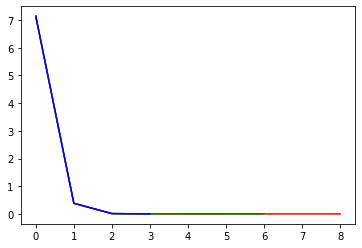

In [43]:
# jacobi method
import matplotlib.pyplot as plt

solution, iterations, error = jacobi(A, B, x0, tol=1e-9)
print(f"tol=1e-9: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'r')

solution, iterations, error = jacobi(A, B, x0, tol=1e-6)
print(f"tol=1e-6: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'g')

solution, iterations, error = jacobi(A, B, x0, tol=1e-3)
print(f"tol=1e-3: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'b')


plt.show()



tol=1e-9: solution=array([ 3. , -2.5,  7. ]), iterations=6
tol=1e-6: solution=array([ 3. , -2.5,  7. ]), iterations=4
tol=1e-3: solution=array([ 3.00000035, -2.50000004,  6.99999999]), iterations=3


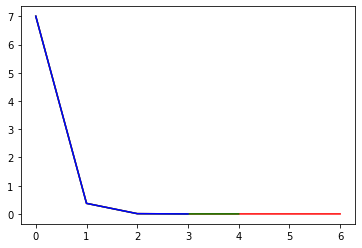

In [44]:
# gs method


solution, iterations, error = gauss_seidel(A, B, x0, tol=1e-9)
print(f"tol=1e-9: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'r')

solution, iterations, error = gauss_seidel(A, B, x0, tol=1e-6)
print(f"tol=1e-6: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'g')

solution, iterations, error = gauss_seidel(A, B, x0, tol=1e-3)
print(f"tol=1e-3: {solution=}, {iterations=}")
plt.plot(np.arange(0, len(error)), error, 'b')


plt.show()


In [ ]:
"""
As the tolerance decreases, the number of iterations 
required for convergence increases. At the same time, 
the error goes down. 

The Gauss Seidel method takes less iterations to run
than the jacobi method.

"""